In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore') 

train = pd.read_csv('./train_data.csv')
test = pd.read_csv('./test_data.csv')

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

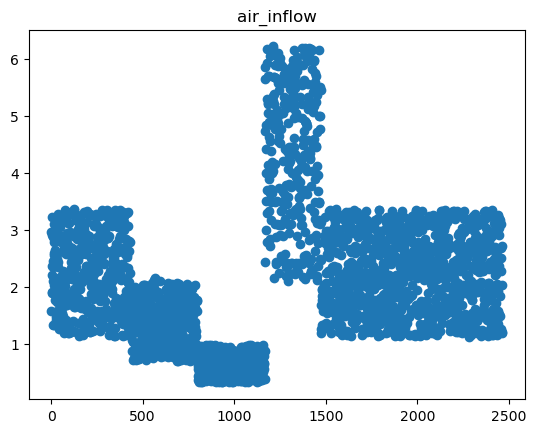

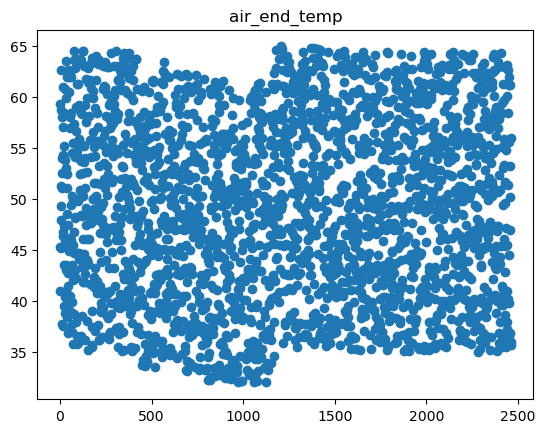

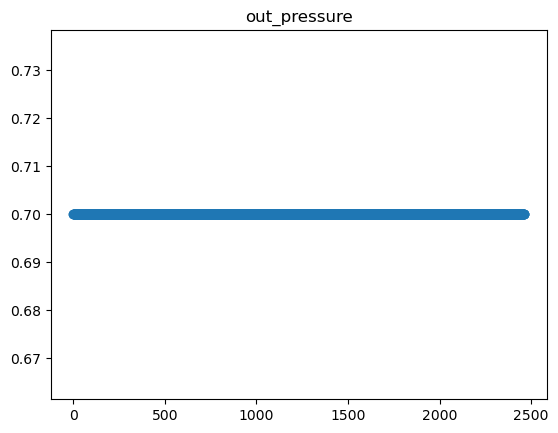

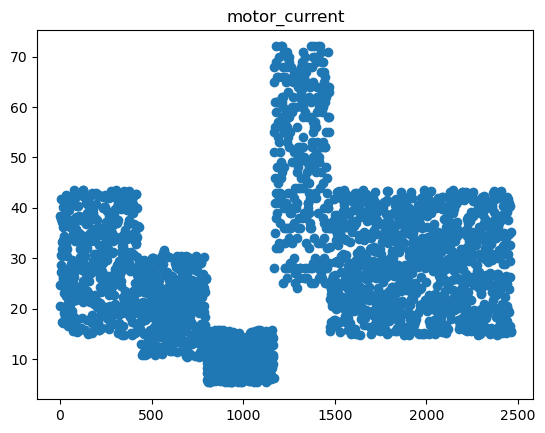

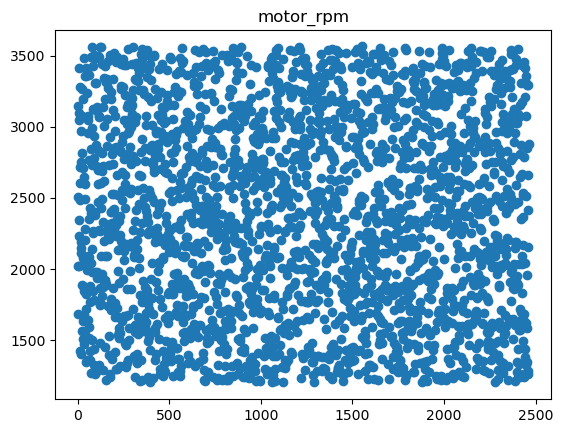

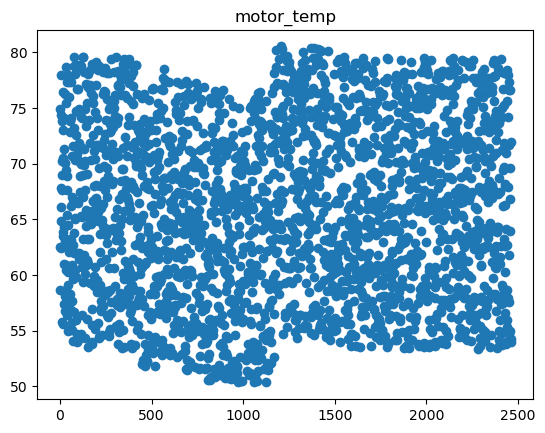

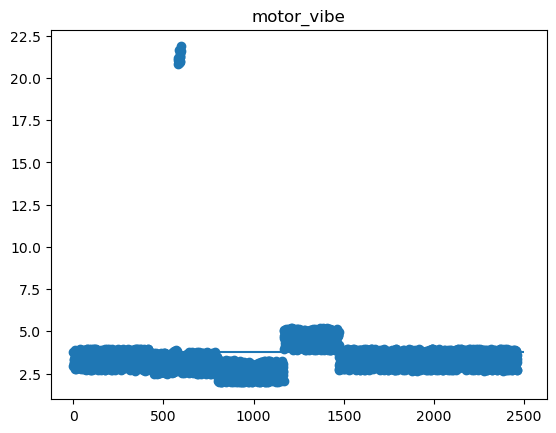

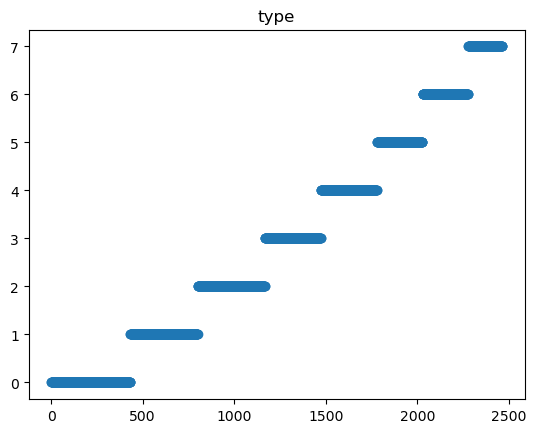

In [2]:
for i in train.columns:
    plt.title(i)
    plt.scatter(range(len(train)),train[i])
    if i == 'motor_vibe':
        plt.hlines(3.75,0,2500)
    plt.show()

In [3]:
train = train[train['motor_vibe'] < 10]

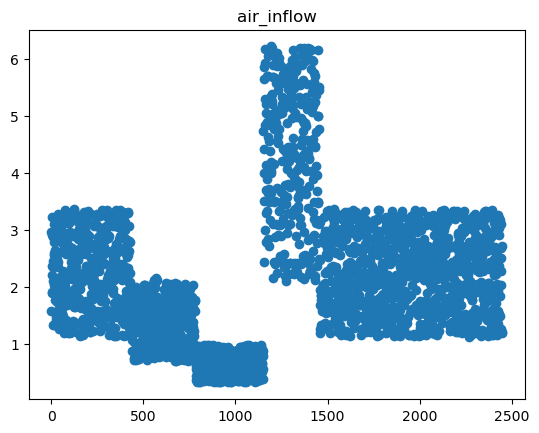

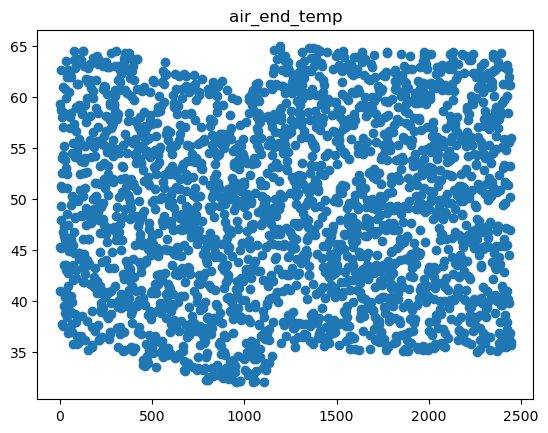

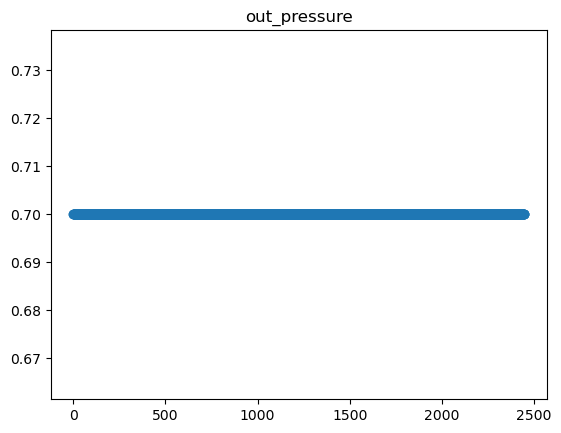

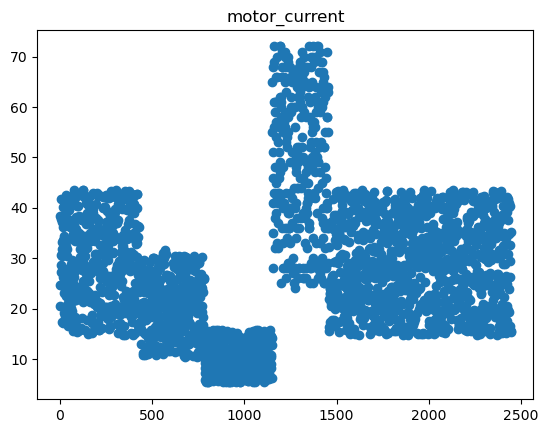

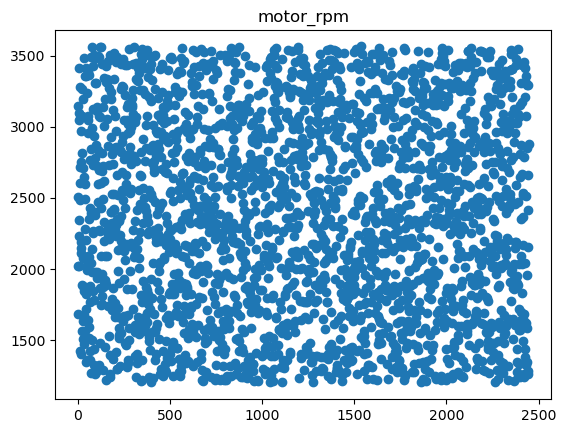

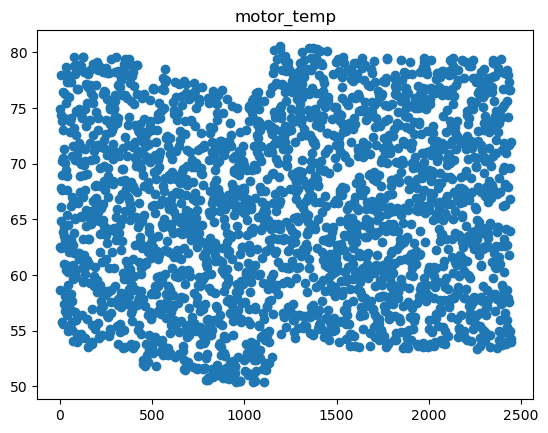

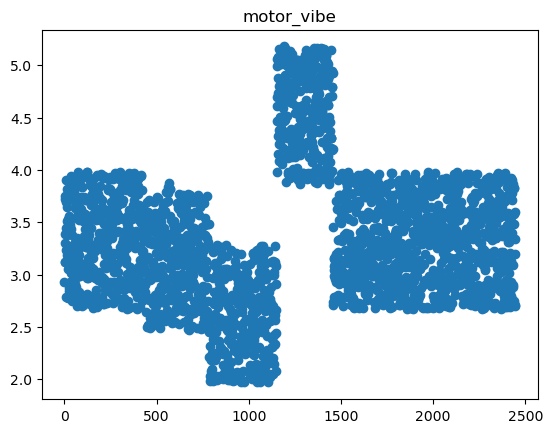

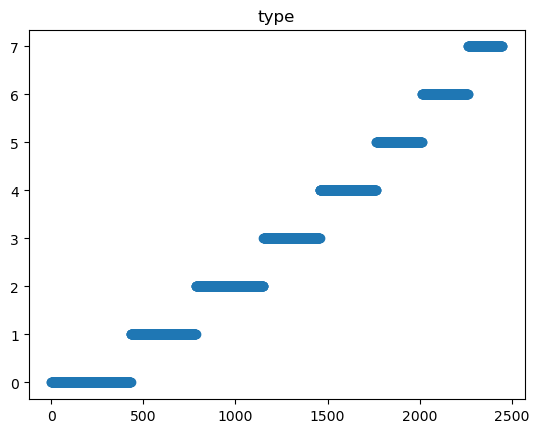

In [4]:
for i in train.columns:
    plt.title(i)
    plt.scatter(range(len(train)),train[i])
    plt.show()

In [5]:
train[(train['type'] == 1)].describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
count,353.000000,353.000000,3.530000e+02,353.000000,353.000000,353.000000,353.000000,353.0
mean,1.378555,47.505212,7.000000e-01,20.322266,2353.042493,64.235467,3.116516,1.0
std,0.396050,8.431313,4.447196e-15,5.829261,673.902492,7.496179,0.375935,0.0
min,0.710000,33.130000,7.000000e-01,10.420000,1210.000000,51.440000,2.470000,1.0
25%,1.050000,40.490000,7.000000e-01,15.480000,1798.000000,57.990000,2.800000,1.0
50%,1.380000,47.490000,7.000000e-01,20.310000,2346.000000,64.230000,3.110000,1.0
75%,1.700000,54.430000,7.000000e-01,25.090000,2914.000000,70.380000,3.420000,1.0
max,2.170000,63.450000,7.000000e-01,31.610000,3556.000000,78.510000,3.880000,1.0


In [6]:
train[train['type'] == 1] = train[(train['type'] == 1) & (train['motor_vibe'] < 3.76)]
train = train.drop('out_pressure',axis=1)

In [7]:
# label = [0 for _ in range(len(test))]
# for i in test[test['out_pressure'] != 0.7].index:
#     label[i] = 1

test = test.drop('out_pressure',axis=1)

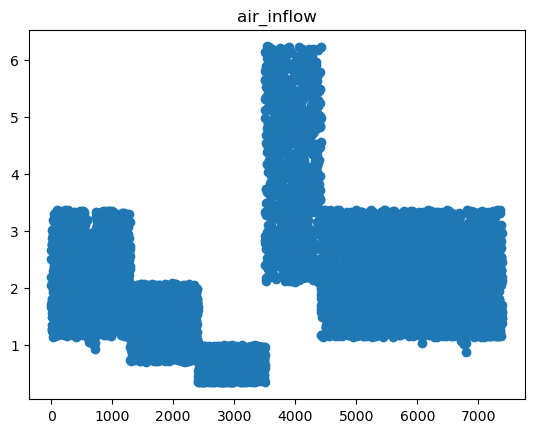

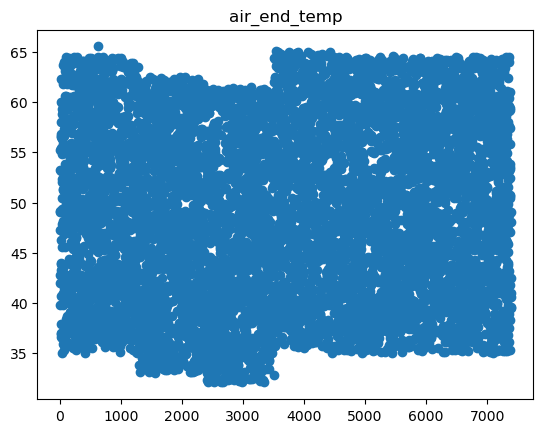

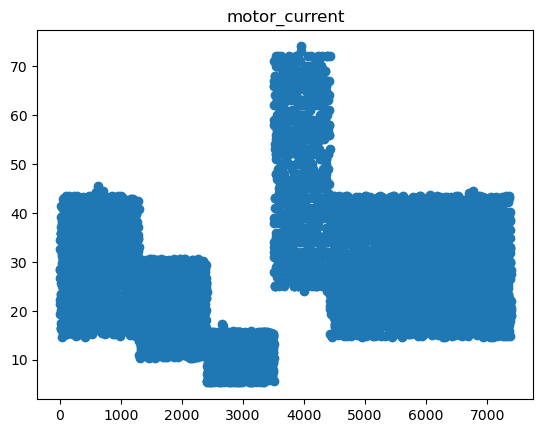

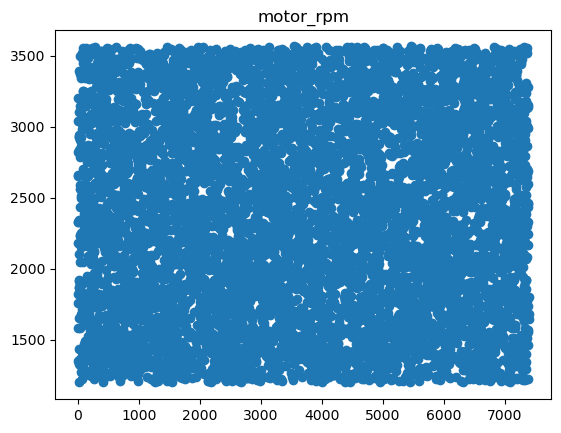

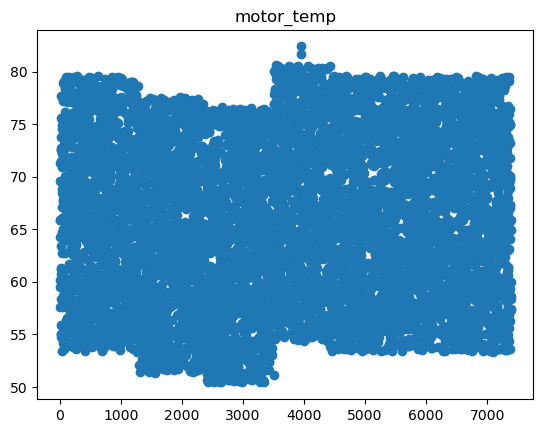

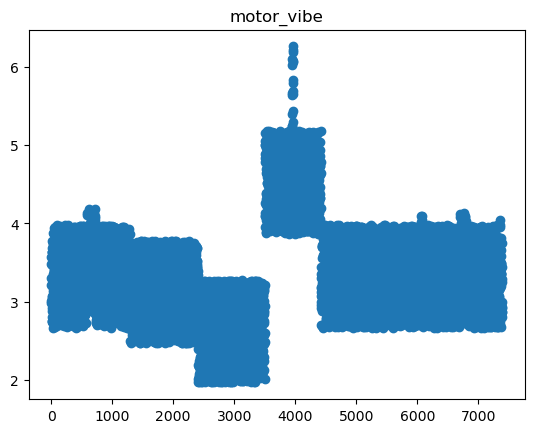

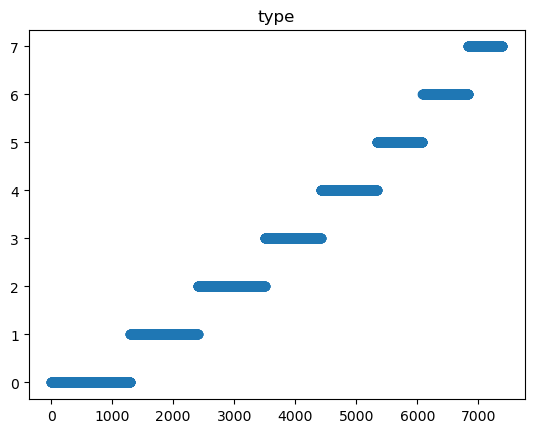

In [8]:
for i in train.columns:
    plt.title(i)
    plt.scatter(range(len(test)),test[i])
    plt.show()

In [9]:
train = train.dropna()
train = train.reset_index(drop=True)

In [10]:
train_type = [i[1] for i in train.groupby('type')]

In [11]:
conc = pd.DataFrame()
for i in train_type:
    conc = pd.concat([conc,i])
train = conc.reset_index(drop=True)

In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
tar = pd.DataFrame(ohe.fit_transform(train[['type']]))

In [13]:
setting = 'motor_current'
tar = pd.DataFrame(ohe.fit_transform(train[['type']]))
target = pd.concat([train.loc[:,train.columns[:-1]],tar],axis=1)
label = target[setting]
target = target.drop(setting,axis=1)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(target,label)

LinearRegression()

In [15]:
tar = pd.DataFrame(ohe.fit_transform(test[['type']]))
target = pd.concat([test.loc[:,test.columns[:-1]],tar],axis=1)
label = target[setting]
target = target.drop(setting,axis=1)

In [16]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
value = scaler.fit_transform(np.array(model.predict(target) - test[setting]).reshape(-1,1))

In [17]:
# from sklearn.linear_model import LinearRegression
# linear = LinearRegression()
# linear.fit(train.drop('motor_vibe',axis=1),train['motor_vibe'])
# linear.predict(test.drop('motor_vibe',axis=1))

(-1.0, 1.0)

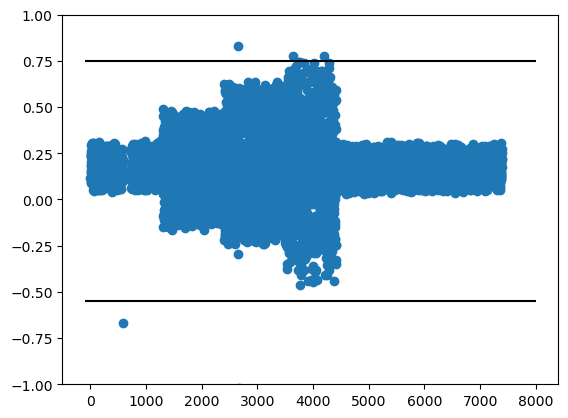

In [35]:
plt.scatter(range(len(value)),value)
plt.hlines(0.75,-100,8000,colors='black')
plt.hlines(-0.55,-100,8000,colors='black')

plt.ylim(-1,1)


In [36]:
# motor_rpm : Abnormal - 338
tp = pd.DataFrame(value)
tp_ = list(tp[0])
temp = [0 for _ in range(len(test))]
for i in range(len(test)):
    if tp_[i] > 0.75 or tp_[i] < -0.55:
        temp[i] = 1

In [37]:
# motor_current : Abnormal - 341
# tp = pd.DataFrame(value)
# tp_ = list(tp[0])
# temp = [0 for _ in range(len(test))]
# for i in range(len(test)):
#     if tp_[i] > 0.8 or tp_[i] < -0.5:
#         temp[i] = 1

In [38]:
# motor vibe : Abnormal - 338
# tp = pd.DataFrame(value)
# tp_ = list(tp[0])
# temp = [0 for _ in range(len(test))]
# for i in range(len(test)):
#     if tp_[i] > 0.164 or tp_[i] < -0.05:
#         temp[i] = 1

In [39]:
sum(temp)

336

In [40]:
test = pd.read_csv('./test_data.csv')
for i in test[test['out_pressure'] != 0.7].index:
    temp[i] = 1

In [41]:
sum(temp)

343

In [42]:
sub = pd.read_csv('./answer_sample.csv')
sub['label'] = temp
sub.set_index('type')
sub.to_csv(f'./submission_{setting}.csv')

---